<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/comparing_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing the performance of different machine learning algorithms**

Comparing Machine Learning Algorithms (MLAs) are important to come out with the best-suited algorithm for a particular problem. This post discusses comparing different machine learning algorithms and how we can do this using scikit-learn package of python. You will learn how to compare multiple MLAs at a time using more than one fit statistics provided by scikit-learn and also creating plots to visualize the differences.

**Importing required packages**

The first part is to load all the packages needed in this comparison. Besides the basic packages like pandas, numpy, matplotlib we will import some of the scikit-learn packages for application of the MLAs and their comparison.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**Importing the data set and checking if there is any NULL values**

This part of code will load the diabetes data set and check for any null values in the data frame.

In [11]:
dataset=pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking the data set for any NULL values is very essential, as MLAs can not handle NULL values. We have to either eliminate the records with NULL values or replace them with the mean/median of the other values. we can see each of the variables are printed with number of null values. This data set has no null values so all are zero here.

**Storing the independent and dependent variables**


As we can see that the data frame contains nine variables in nine columns. The first eight columns contain the independent variables. These are some physiological variables having a correlation with diabetes symptoms. The ninth column shows if the patient is diabetic or not. So, here the x stores the independent variables and y stores the dependent variable diabetes count.

In [13]:
x=dataset.iloc[:,: -1]
y=dataset.iloc[:,-1]

**Data splitting**

Here the data set has been divided into train and test data set. The test data set size is 20% of the total records. This test data will not be used in model training and work as an independent test data.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

**Storing machine learning algorithms (MLA) in a variable**


Some very popular MLAs we have selected here for comparison and stored in a variable; so that they can be used at later part of the process. The MLAs first we have taken up for comparison are Logistic Regression, Linear Discriminant Analysis, K-nearest neighbour classifier, Decision tree classifier, Naive-Bayes classifier and Support Vector Machine.

In [15]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

**Creating a box plot to compare there accuracy**

This part of code creates a box plot for all the models against their cross validation score.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.760524 (0.047424)
LDA: 0.754019 (0.046260)
KNN: 0.700291 (0.042088)
CART: 0.669381 (0.070767)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.737811 (0.044982)
SVM: 0.744368 (0.038490)


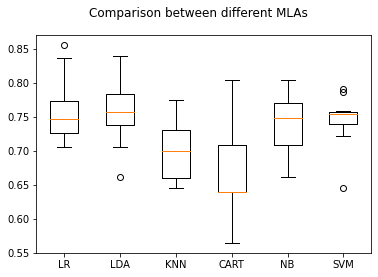

In [16]:
seed=123
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The cross validation score are printed below and it is clearly suggesting Logistic Regression and Linear Discriminant Analysis to the two most accurate MLAs.
Below is a box-whisker plot to visualize the same result.

**Comparing all machine learning algorithms**

In [17]:
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1

In [19]:
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,LogisticRegressionCV,0.7655,0.8247,0.763158,0.617021,0.766455
2,RidgeClassifierCV,0.7622,0.8247,0.763158,0.617021,0.766455
12,NuSVC,0.7850,0.8182,0.771429,0.574468,0.749851
7,ExtraTreesClassifier,1.0000,0.8117,0.687500,0.702128,0.780970
8,GradientBoostingClassifier,0.9186,0.8117,0.687500,0.702128,0.780970
9,RandomForestClassifier,1.0000,0.8052,0.688889,0.659574,0.764367
11,SVC,0.7590,0.7922,0.727273,0.510638,0.713263
14,DecisionTreeClassifier,1.0000,0.7922,0.647059,0.702128,0.766952
16,GaussianNB,0.7573,0.7922,0.674419,0.617021,0.743090
5,AdaBoostClassifier,0.8176,0.7792,0.632653,0.659574,0.745675


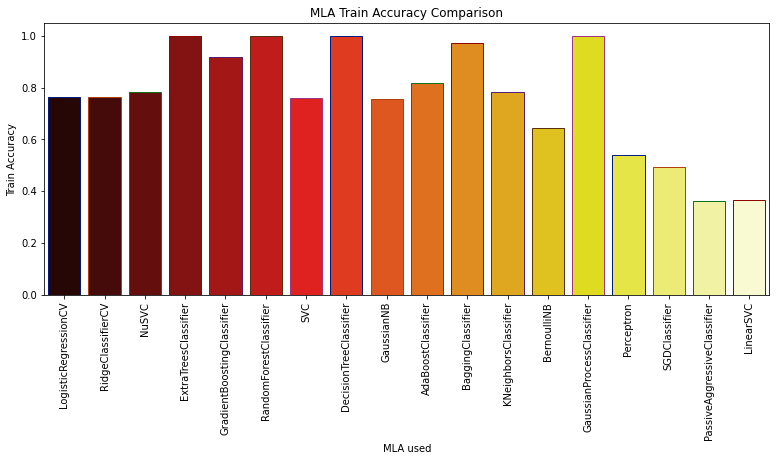

In [20]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

**Creating plot to show the test accuracy**

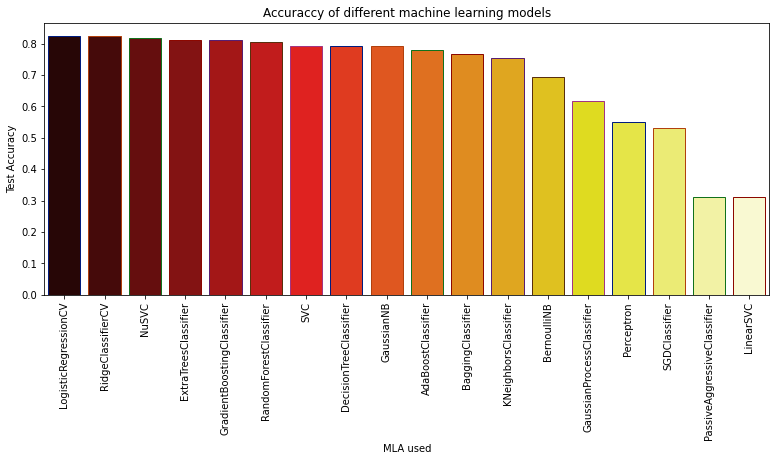

In [21]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

**Creating plots to compare precission of the MLAs**

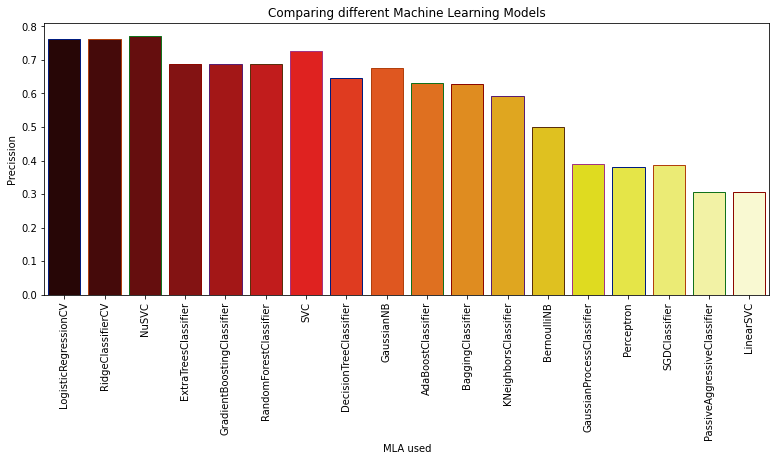

In [22]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

**Creating plots for MLA recall comparison**

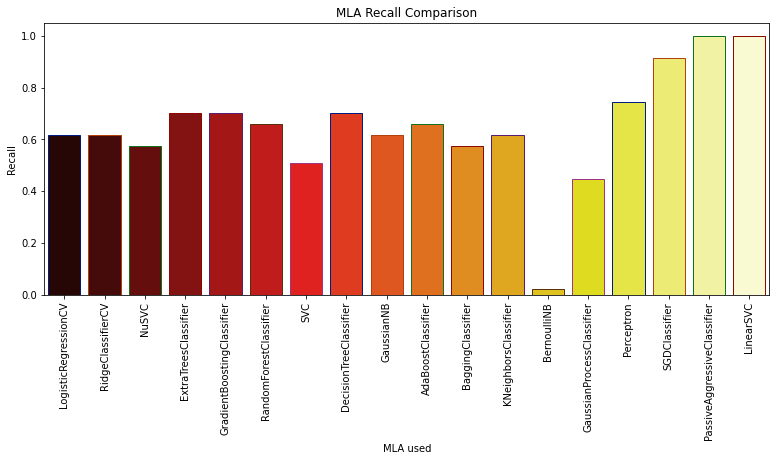

In [23]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

**Creating plot for MLA AUC comparison**

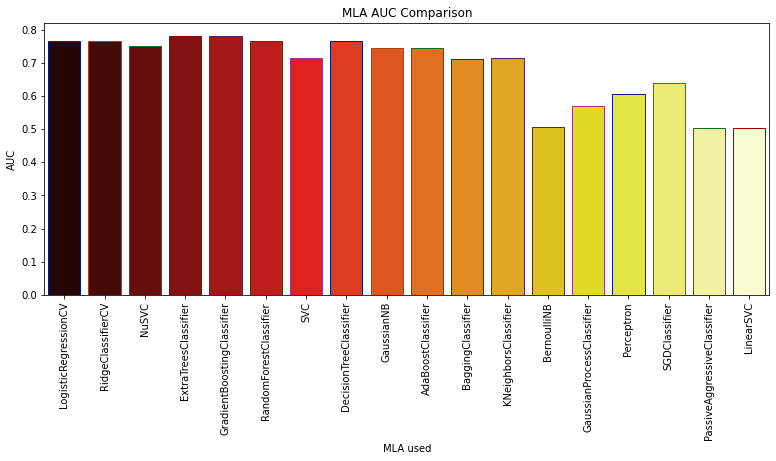

In [24]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

**Creating ROC for all the models applied**

Receiver Operating Characteristic (ROC) curve is a very important tool to diagnose the performance of MLAs by plotting the true positive rates against the false-positive rates at different threshold levels. The area under ROC curve often called AUC and it is also a good measure of the predictability of the machine learning algorithms. A higher AUC is an indication of more accurate prediction.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


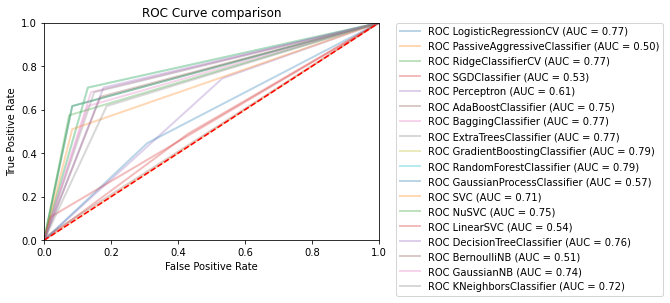

In [25]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()